In [1]:
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from PIL import Image
import matplotlib.pyplot as plt
from skimage import util
import sys
import ipywidgets as widgets
import IPython.display as display

Resolution of Image:  (964, 1280) 

Image:


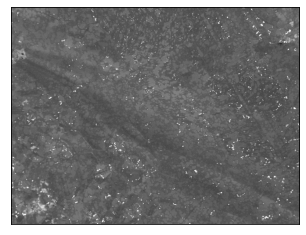

In [2]:
img_in = np.array(Image.open('../data/test_kmeans.tif').convert('L'))
print("Resolution of Image: ", img_in.shape, "\n")
print("Image:")
imgplot = plt.imshow(img_in, cmap='gray')
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)

In [3]:
def pad(img,wsize,stride=1):
    height,width = img.shape
    if stride == 'block':
        adj = 0
        stride = wsize
    else:
        adj = 1

    px = wsize - height % stride - adj
    if px % 2 == 0:
        px = int(px/2)
        px = (px,px)
    else:
        px = int((px-1)/2)
        px = (px,px+1)

    py = wsize - width % stride - adj
    if py % 2 == 0:
        py = int(py/2)
        py = (py,py)
    else:
        py = int((py-1)/2)
        py = (py,py+1)

    return np.pad(img,pad_width=(px,py),mode='symmetric')

In [4]:
wsize = 30
n_clusters = 5
stride = 3
seed = 197208

In [5]:
kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=seed)

# img_in = img

X = util.view_as_windows(
    pad(img_in,wsize=wsize,stride=stride),
    window_shape=(wsize,wsize),
    step=stride)

mask_dim = X.shape[:2]
X=X.reshape(-1,wsize**2)

kmeans = kmeans.fit(X)

In [6]:
mb_kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    random_state=seed)

# img_in = img

mb_X = util.view_as_windows(
    pad(img_in,wsize=wsize,stride=stride),
    window_shape=(wsize,wsize),
    step=stride)

mb_mask_dim = mb_X.shape[:2]
mb_X=mb_X.reshape(-1,wsize**2)

mb_kmeans = mb_kmeans.fit(mb_X)

In [7]:
np.set_printoptions(threshold=10)

mask = kmeans.labels_.reshape(*mask_dim)
mask = Image.fromarray(mask)

mb_mask = mb_kmeans.labels_.reshape(*mb_mask_dim)
mb_mask = Image.fromarray(mb_mask)

In [8]:
clusters = np.array(mask.resize(img_in.shape[::-1])).astype(np.uint8)+1
mb_clusters = np.array(mb_mask.resize(img_in.shape[::-1])).astype(np.uint8)+1

mb_clusters

array([[5, 5, 5, ..., 4, 4, 4],
       [5, 5, 5, ..., 4, 4, 4],
       [5, 5, 5, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3]], dtype=uint8)

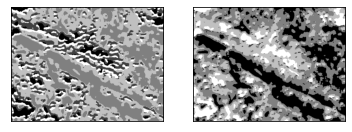

<Figure size 17280x23040 with 0 Axes>

In [9]:
fig, ax = plt.subplots(1,2)
fig = plt.figure(figsize=(240,320))
ax[0].imshow(clusters, cmap='gray');
ax[1].imshow(mb_clusters, cmap='gray');

ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_yaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[1].axes.get_yaxis().set_visible(False)

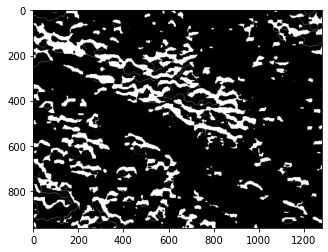

In [11]:
region_1 = np.where(clusters == 2, 1,0)
plt.imshow(region, cmap='gray')